# Decision  Tree Classification: Iris Dataset

 This dataset consist 3 species of plant with petal width and length data samples. In the below R code “rpart” package used to create a decision tree model for predicting the species using the petal information.

In [28]:
#Importing the packages
library(rpart)
library(rpart.plot)
library(Metrics)
library(ggplot2)
library(caret)

In [29]:
#Importing the Dataset
irisdata=read.csv('iris.csv')
irisdata=irisdata[2:6]


In [9]:
#Exploratory Data Analysis
head(irisdata)
tail(irisdata)

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.3,5.7,2.5,Iris-virginica
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
summary(irisdata)

 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     

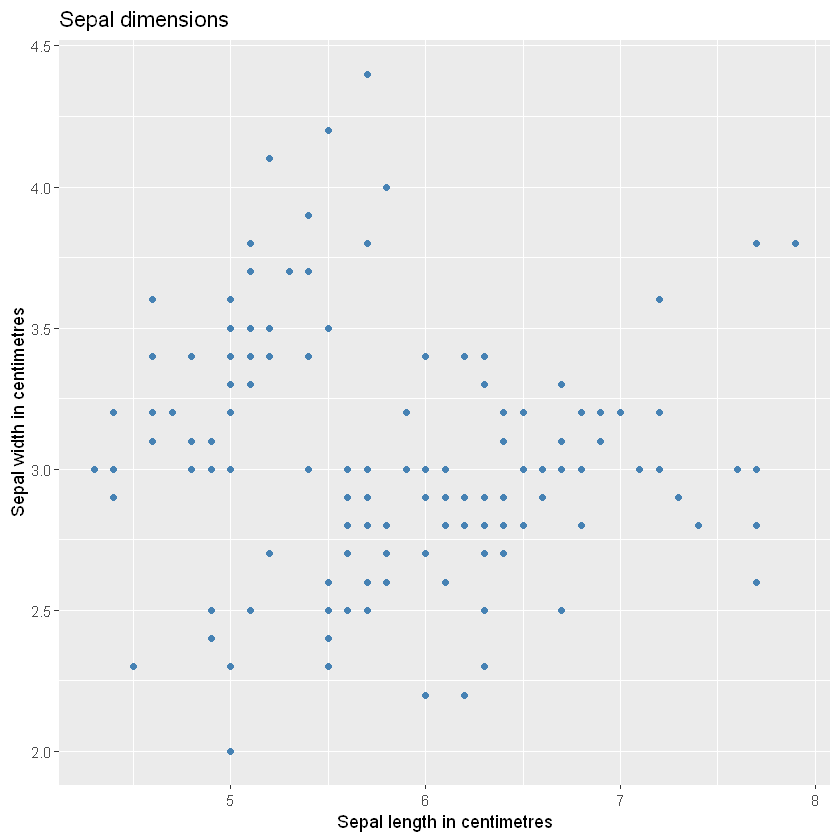

In [31]:
#Data Visualisation
ggplot(irisdata, aes(x = SepalLengthCm, y = SepalWidthCm)) +
  geom_point(col = "steelblue")+
  ggtitle("Sepal dimensions") +
  xlab("Sepal length in centimetres") +
  ylab("Sepal width in centimetres")

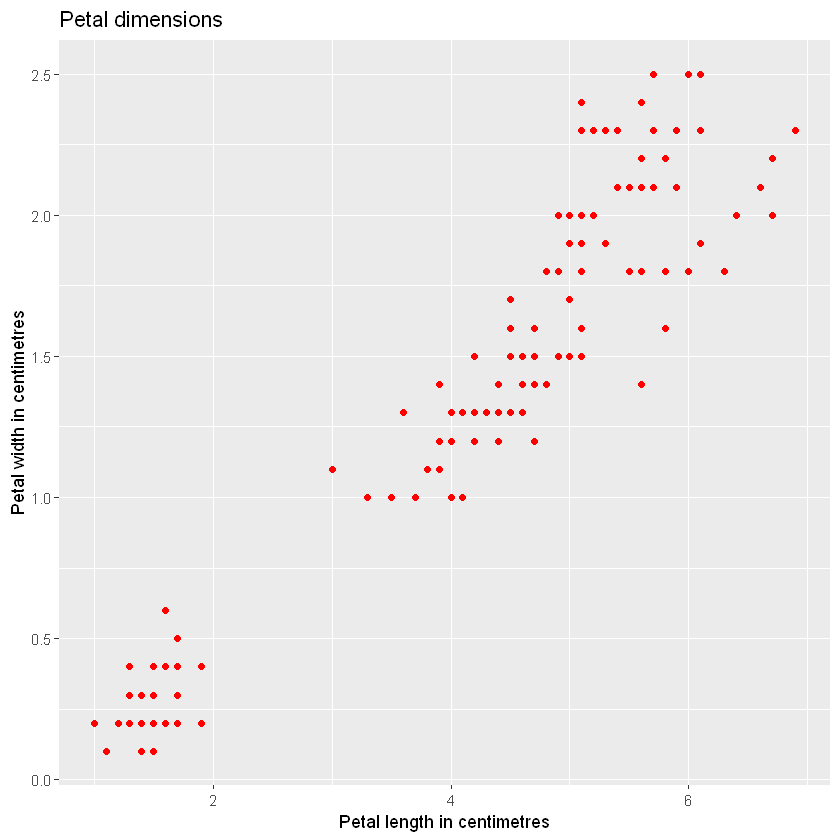

In [12]:
ggplot(irisdata, aes(x = PetalLengthCm, y = PetalWidthCm)) +
  geom_point(col = "red")+
  ggtitle("Petal dimensions") +
  xlab("Petal length in centimetres") +
  ylab("Petal width in centimetres")

Now, we split out entire dataset into two parts - the training set and the testing set. This is a very common practice in machine learning - wherein, we train a machine learning algorithm with the training data, and then test our model using the testing data.

In [32]:
#calling the library and setting the seed
library(caTools)
set.seed(123)

#splitting the data into training and test set
split = sample.split(irisdata$Species, SplitRatio = 0.80)
training_set = subset(irisdata, split == TRUE)
test_set = subset(irisdata, split == FALSE)


we can now build our decision tree. To do that, we first build a formula which we shall be using to depict the dependencies. For this problem, we're trying to build a model that tries to classify (classification tree) a test data point, into one of the three Species classes - i.e. setosa, virginica or versicolor. The input is a tuple consisting of SepalLengthCm,SepalWidthCm,PetalLengthCm and PetalWidthCm

In [33]:
# Fitting Decision Tree Classification to the Training set
classifier<- rpart ( Species ~., training_set, method ="class")

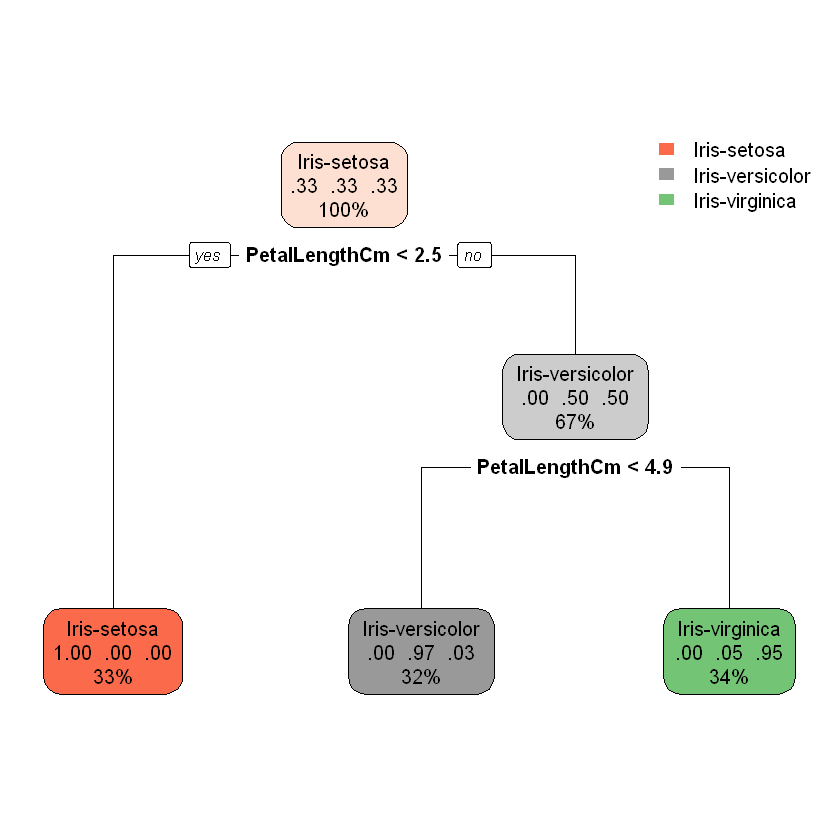

In [15]:
#Plot the model 
rpart.plot(classifier)

The result is a very short tree: if Petal.Length is smaller than 2.5 we label the flower with setosa. Else we look at the variable Petal.Width. Is Petal.Width smaller than 1.6? If so, we label the flower versicolor, else virginica.

Now that our model is built, we can cross-check its validity by pitching it against our test data. So we use the predict function to predict the classes of the test data. And then create a matrix showing the comparison between the prediction result and the actual category.

In [34]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set, type = 'class')
y_pred


4               5               8              11              16 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             20              21              24              31              32 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             53              59              65              67              68 
 Iris-virginica Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor 
             69              84              87              88              89 
Iris-versicolor  Iris-virginica Iris-versicolor Iris-versicolor Iris-versicolor 
            104             106             107             111             114 
 Iris-virginica  Iris-virginica Iris-versicolor  Iris-virginica  Iris-virginica 
            118             126             132             139             145 
 Iris-virginica  Iris-virginica  Iris-virginica Iris-versicolor  Iris-virginica 
Levels: Iris-setosa Iris-versicolor Iris-virginica

In [38]:
# Making the Confusion Matrix
confusionMatrix(y_pred,test_set[,5])

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               8              2
  Iris-virginica            0               2              8

Overall Statistics
                                          
               Accuracy : 0.8667          
                 95% CI : (0.6928, 0.9624)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.296e-09       
                                          
                  Kappa : 0.8             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 0.8000
Specificity                      1.0000                 0.9000
Pos Pred Value                   1.0000                 0.8000
Neg Pred Value

Trying another package - party. It has ctree() function for fitting conditional trees. 
    

In [39]:
library(party)
iris_ctree <- ctree(Species ~ SepalLengthCm+SepalWidthCm+PetalLengthCm+PetalWidthCm, data=irisdata)


In [40]:
print(iris_ctree)


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm 
Number of observations:  150 

1) PetalLengthCm <= 1.9; criterion = 1, statistic = 140.257
  2)*  weights = 50 
1) PetalLengthCm > 1.9
  3) PetalWidthCm <= 1.7; criterion = 1, statistic = 67.894
    4) PetalLengthCm <= 4.8; criterion = 0.999, statistic = 13.865
      5)*  weights = 46 
    4) PetalLengthCm > 4.8
      6)*  weights = 8 
  3) PetalWidthCm > 1.7
    7)*  weights = 46 


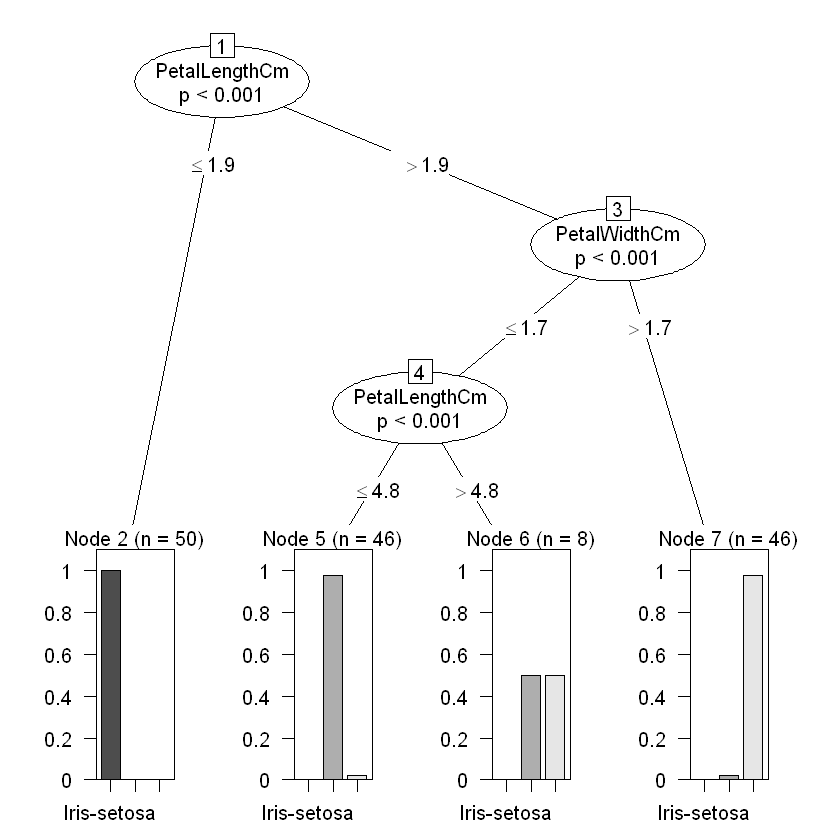

In [41]:
plot(iris_ctree)